In [18]:
import os
import shutil
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scanpy as sc
import seaborn as sns
import tifffile
from pathlib import Path

from mip.utils import listfiles
from skimage.measure import regionprops_table

#### Angelo htan

In [65]:
ome_fps = sorted(listfiles('/diskmnt/Projects/Users/estorrs/multiplex_data/analysis/brca_dcis_v1/preprocessing/angelo/ome_tiffs/',
                         regex='ome.tiff$'))
ome_fps

['/diskmnt/Projects/Users/estorrs/multiplex_data/analysis/brca_dcis_v1/preprocessing/angelo/ome_tiffs/Point2203_pt1072_31606.ome.tiff',
 '/diskmnt/Projects/Users/estorrs/multiplex_data/analysis/brca_dcis_v1/preprocessing/angelo/ome_tiffs/Point2204_pt1071_31605.ome.tiff',
 '/diskmnt/Projects/Users/estorrs/multiplex_data/analysis/brca_dcis_v1/preprocessing/angelo/ome_tiffs/Point2206_pt1116_31620.ome.tiff',
 '/diskmnt/Projects/Users/estorrs/multiplex_data/analysis/brca_dcis_v1/preprocessing/angelo/ome_tiffs/Point2302_pt1046_20671.ome.tiff',
 '/diskmnt/Projects/Users/estorrs/multiplex_data/analysis/brca_dcis_v1/preprocessing/angelo/ome_tiffs/Point2303_pt1047_20672.ome.tiff',
 '/diskmnt/Projects/Users/estorrs/multiplex_data/analysis/brca_dcis_v1/preprocessing/angelo/ome_tiffs/Point2304_pt1089_20677.ome.tiff',
 '/diskmnt/Projects/Users/estorrs/multiplex_data/analysis/brca_dcis_v1/preprocessing/angelo/ome_tiffs/Point2305_pt2000_20689_Normal.ome.tiff',
 '/diskmnt/Projects/Users/estorrs/multipl

In [47]:
mask_fps = sorted(listfiles('/diskmnt/Projects/Users/estorrs/multiplex_data/analysis/brca_dcis_v1/preprocessing/angelo/region_mask_final/',
                         regex='tif$'))
mask_fps

['/diskmnt/Projects/Users/estorrs/multiplex_data/analysis/brca_dcis_v1/preprocessing/angelo/region_mask_final/Point2203_pt1072_31606.tif',
 '/diskmnt/Projects/Users/estorrs/multiplex_data/analysis/brca_dcis_v1/preprocessing/angelo/region_mask_final/Point2204_pt1071_31605.tif',
 '/diskmnt/Projects/Users/estorrs/multiplex_data/analysis/brca_dcis_v1/preprocessing/angelo/region_mask_final/Point2206_pt1116_31620.tif',
 '/diskmnt/Projects/Users/estorrs/multiplex_data/analysis/brca_dcis_v1/preprocessing/angelo/region_mask_final/Point2302_pt1046_20671.tif',
 '/diskmnt/Projects/Users/estorrs/multiplex_data/analysis/brca_dcis_v1/preprocessing/angelo/region_mask_final/Point2303_pt1047_20672.tif',
 '/diskmnt/Projects/Users/estorrs/multiplex_data/analysis/brca_dcis_v1/preprocessing/angelo/region_mask_final/Point2304_pt1089_20677.tif',
 '/diskmnt/Projects/Users/estorrs/multiplex_data/analysis/brca_dcis_v1/preprocessing/angelo/region_mask_final/Point2305_pt2000_20689_Normal.tif',
 '/diskmnt/Projects/

In [48]:
feats_fps = sorted(listfiles('/diskmnt/Projects/Users/estorrs/multiplex_data/analysis/brca_dcis_v1/preprocessing/angelo/spatial_features/',
                         regex='txt$'))
feats_fps

['/diskmnt/Projects/Users/estorrs/multiplex_data/analysis/brca_dcis_v1/preprocessing/angelo/spatial_features/Point2203.txt',
 '/diskmnt/Projects/Users/estorrs/multiplex_data/analysis/brca_dcis_v1/preprocessing/angelo/spatial_features/Point2204.txt',
 '/diskmnt/Projects/Users/estorrs/multiplex_data/analysis/brca_dcis_v1/preprocessing/angelo/spatial_features/Point2206.txt',
 '/diskmnt/Projects/Users/estorrs/multiplex_data/analysis/brca_dcis_v1/preprocessing/angelo/spatial_features/Point2302.txt',
 '/diskmnt/Projects/Users/estorrs/multiplex_data/analysis/brca_dcis_v1/preprocessing/angelo/spatial_features/Point2303.txt',
 '/diskmnt/Projects/Users/estorrs/multiplex_data/analysis/brca_dcis_v1/preprocessing/angelo/spatial_features/Point2304.txt',
 '/diskmnt/Projects/Users/estorrs/multiplex_data/analysis/brca_dcis_v1/preprocessing/angelo/spatial_features/Point2305.txt',
 '/diskmnt/Projects/Users/estorrs/multiplex_data/analysis/brca_dcis_v1/preprocessing/angelo/spatial_features/Point2306.txt',


In [66]:
len(mask_fps), len(feats_fps), len(ome_fps)

(81, 79, 81)

In [69]:
point_to_mask = {}
for fp in mask_fps:
    pt = fp.split('/')[-1].split('_')[0].replace('Point', '')
    point_to_mask[pt] = fp
    
point_to_feats = {}
for fp in feats_fps:
    pt = fp.split('/')[-1].split('.')[0].replace('Point', '')
    point_to_feats[pt] = fp
    
point_to_ome = {}
for fp in ome_fps:
    pt = fp.split('/')[-1].split('_')[0].replace('Point', '')
    point_to_ome[pt] = fp

In [70]:
a = set(point_to_feats.keys())
b = set(point_to_mask.keys())
c = set(point_to_ome.keys())

len(a.intersection(b).intersection(c))

79

the two missing are tonsil

In [71]:
b - a

{'3201', '5311'}

In [72]:
[fp for fp in mask_fps if '5311' in fp]

['/diskmnt/Projects/Users/estorrs/multiplex_data/analysis/brca_dcis_v1/preprocessing/angelo/region_mask_final/Point5311_31640_Tonsil.tif']

In [73]:
pt = next(iter(point_to_mask.keys()))
pt

'2203'

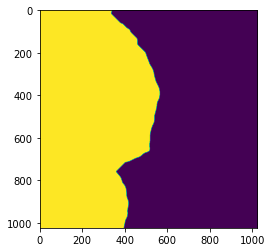

In [55]:
plt.imshow(tifffile.imread(point_to_mask[pt]))

In [56]:
df = pd.read_csv(point_to_feats[pt], sep='\t', index_col=0)
df

,x,y,cell_type
label,,,
2,549,418,TUMOR_LUMINAL
3,391,1012,TUMOR_CK5
4,451,572,TUMOR_LUMINAL
8,304,21,TUMOR_ECADCK
9,321,35,TUMOR_ECADCK
...,...,...,...
1205,672,712,CD8T
1210,829,115,OTHER
1211,1015,236,CAF


<AxesSubplot:xlabel='x', ylabel='y'>

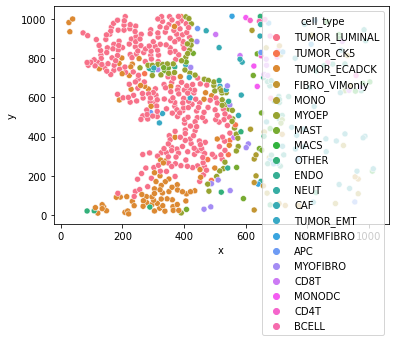

In [57]:
sns.scatterplot(data=df, x='x', y='y', hue='cell_type')

In [58]:
channel_dict = {
    'SMA': [1]
}
channel_df = pd.DataFrame(channel_dict).transpose()
channel_df.index.name = 'channel'
channel_df.columns = ['threshold']
channel_df

,threshold
channel,
SMA,1


In [62]:
run_dir = f'/diskmnt/Projects/Users/estorrs/multiplex_data/analysis/dcis_region_analysis/angelo_v1'
for pt in point_to_feats:
    Path(os.path.join(run_dir, f'Point{pt}')).mkdir(parents=True, exist_ok=True)

In [74]:
commands = []
for pt in point_to_feats:
    directory = os.path.join(run_dir, f'Point{pt}', 'inputs')
    Path(directory).mkdir(parents=True, exist_ok=True)
    shutil.copy(point_to_feats[pt], os.path.join(directory, 'spatial_features.txt'))
    shutil.copy(point_to_mask[pt], os.path.join(directory, 'ductal_mask.tif'))
    shutil.copy(point_to_ome[pt], os.path.join(directory, f'{pt}.ome.tiff'))
    channel_df.to_csv(os.path.join(directory, 'channel_thresholds.txt'), sep='\t')
    
    pieces = [
        'mip', 'generate-region-features',
        '--spatial-features', os.path.join(directory, 'spatial_features.txt'),
        '--ome-tiff', os.path.join(directory, f'{pt}.ome.tiff'),
        '--regions-mask', os.path.join(directory, 'ductal_mask.tif'),
        '--channel-thresholds', os.path.join(directory, 'channel_thresholds.txt'),
        '--output-dir', os.path.join(run_dir, f'Point{pt}', 'outputs'),
    ]
    cmd = ' '.join(pieces)
    commands.append(cmd)
commands[0]

'mip generate-region-features --spatial-features /diskmnt/Projects/Users/estorrs/multiplex_data/analysis/dcis_region_analysis/angelo_v1/Point2203/inputs/spatial_features.txt --ome-tiff /diskmnt/Projects/Users/estorrs/multiplex_data/analysis/dcis_region_analysis/angelo_v1/Point2203/inputs/2203.ome.tiff --regions-mask /diskmnt/Projects/Users/estorrs/multiplex_data/analysis/dcis_region_analysis/angelo_v1/Point2203/inputs/ductal_mask.tif --channel-thresholds /diskmnt/Projects/Users/estorrs/multiplex_data/analysis/dcis_region_analysis/angelo_v1/Point2203/inputs/channel_thresholds.txt --output-dir /diskmnt/Projects/Users/estorrs/multiplex_data/analysis/dcis_region_analysis/angelo_v1/Point2203/outputs'

In [75]:
f = open(os.path.join(run_dir, 'run.sh'), 'w')
f.write('\n'.join(commands))
f.close()

#### in house

In [23]:
sample_id = 'HT206B1_H1_06252022'
run_dir = f'/diskmnt/Projects/Users/estorrs/multiplex_data/analysis/brca_dcis_v1/region_metrics/{sample_id}'
Path(run_dir).mkdir(parents=True, exist_ok=True)

In [3]:
a = sc.read_h5ad(f'../../multiplex_data/analysis/brca_dcis_v1/metaclustered/{sample_id}.h5ad')
a.obs

,area,perimeter,bbox_row_min,bbox_col_min,bbox_row_max,bbox_col_max,centroid_row,centroid_col,eccentricity,DAPI intensity max,...,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,metacluster
HT206B1_H1_06252022_1,380,74.041631,0,4821,19,4846,7.505263,4832.971053,0.683004,18790.0,...,0.000000,0.618568,0.019604,0.000000,0.010007,0.000000,0.000000,0.000000,0.303525,Endothelial
HT206B1_H1_06252022_2,310,70.627417,0,4845,16,4868,6.541935,4856.164516,0.722101,61606.0,...,0.000000,0.743646,0.023065,0.000000,0.011769,0.000000,0.000000,0.010209,0.164716,Endothelial
HT206B1_H1_06252022_3,278,80.870058,0,4867,14,4897,4.733813,4879.276978,0.931353,24283.0,...,0.000000,0.821627,0.017061,0.000000,0.000000,0.000000,0.000000,0.000000,0.110602,Endothelial
HT206B1_H1_06252022_4,833,111.941125,0,5634,25,5674,10.346939,5653.015606,0.774127,35152.0,...,0.032994,0.029690,0.078039,0.031300,0.039833,0.031215,0.032178,0.034552,0.660189,Tumor
HT206B1_H1_06252022_5,592,92.769553,0,5721,24,5753,9.847973,5735.261824,0.674520,51562.0,...,0.000000,0.000000,0.019633,0.556573,0.010007,0.000000,0.000000,0.000000,0.365894,Macrophage M1 enriched
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HT206B1_H1_06252022_136402,48,32.349242,20149,10223,20157,10236,20152.750000,10230.020833,0.877933,6102.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.969482,Tumor
HT206B1_H1_06252022_136403,222,73.627417,20150,10913,20160,10942,20155.333333,10927.900901,0.945689,18912.0,...,0.000000,0.000000,0.010322,0.000000,0.000000,0.000000,0.000000,0.000000,0.955039,Tumor
HT206B1_H1_06252022_136404,108,59.798990,20152,10212,20160,10236,20156.500000,10223.629630,0.952507,15680.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.965823,Tumor
HT206B1_H1_06252022_136405,56,33.556349,20154,10458,20160,10473,20157.357143,10465.946429,0.931476,14481.0,...,0.000000,0.000000,0.011221,0.000000,0.000000,0.000000,0.000000,0.000000,0.951174,Tumor


In [6]:
feats = a.obs[['centroid_col', 'centroid_row', 'harmonized_cell_type', 'metacluster']]
feats.columns = ['X', 'Y', 'cell_type', 'metacluster']
feats.index.name = 'cell_id'
feats

,X,Y,cell_type,metacluster
cell_id,,,,
HT206B1_H1_06252022_1,4832.971053,7.505263,Fibroblast,Endothelial
HT206B1_H1_06252022_2,4856.164516,6.541935,Endothelial,Endothelial
HT206B1_H1_06252022_3,4879.276978,4.733813,Endothelial,Endothelial
HT206B1_H1_06252022_4,5653.015606,10.346939,Tumor,Tumor
HT206B1_H1_06252022_5,5735.261824,9.847973,Tumor,Macrophage M1 enriched
...,...,...,...,...
HT206B1_H1_06252022_136402,10230.020833,20152.750000,Tumor,Tumor
HT206B1_H1_06252022_136403,10927.900901,20155.333333,Tumor,Tumor
HT206B1_H1_06252022_136404,10223.629630,20156.500000,Tumor,Tumor


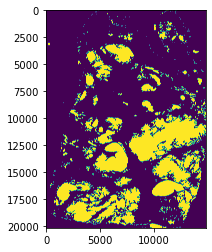

In [24]:
tumor_regions_tif = f'/diskmnt/Projects/Users/estorrs/multiplex_data/codex/htan/brca/{sample_id}/level_3/annotations/tumor_mask_10_alpha.tif'
tumor_regions = tifffile.imread(tumor_regions_tif)
plt.imshow(tumor_regions)

In [15]:
channel_dict = {
    'SMA': [1500],
    'Podoplanin': [5000]
}
channel_df = pd.DataFrame(channel_dict).transpose()
channel_df.index.name = 'channel'
channel_df.columns = ['threshold']
channel_df

,threshold
channel,
SMA,1500
Podoplanin,5000


In [25]:
input_dir = os.path.join(run_dir, 'inputs')
Path(input_dir).mkdir(parents=True, exist_ok=True)

In [26]:
feats_fp = os.path.join(input_dir, 'spatial_features.txt')
feats.to_csv(feats_fp, sep='\t')

In [27]:
channel_fp = os.path.join(input_dir, 'channel_thresholds.txt')
channel_df.to_csv(channel_fp, sep='\t')

In [31]:
ome_tiff_fp = '/diskmnt/Projects/Users/estorrs/multiplex_data/codex/htan/brca/HT206B1_H1_06252022/level_2/HT206B1_H1_06252022.ome.tiff'

In [29]:
out_dir = os.path.join(run_dir, 'outputs')
Path(input_dir).mkdir(parents=True, exist_ok=True)

In [32]:
command = f'mip generate-region-features --spatial-features {feats_fp} \
--ome-tiff {ome_tiff_fp} --regions-mask {tumor_regions_tif} --channel-thresholds {channel_fp} \
--output-dir {out_dir} --max-region-size 50000'

command

'mip generate-region-features --spatial-features /diskmnt/Projects/Users/estorrs/multiplex_data/analysis/brca_dcis_v1/region_metrics/HT206B1_H1_06252022/inputs/spatial_features.txt --ome-tiff /diskmnt/Projects/Users/estorrs/multiplex_data/codex/htan/brca/HT206B1_H1_06252022/level_2/HT206B1_H1_06252022.ome.tiff --regions-mask /diskmnt/Projects/Users/estorrs/multiplex_data/codex/htan/brca/HT206B1_H1_06252022/level_3/annotations/tumor_mask_10_alpha.tif --channel-thresholds /diskmnt/Projects/Users/estorrs/multiplex_data/analysis/brca_dcis_v1/region_metrics/HT206B1_H1_06252022/inputs/channel_thresholds.txt --output-dir /diskmnt/Projects/Users/estorrs/multiplex_data/analysis/brca_dcis_v1/region_metrics/HT206B1_H1_06252022/outputs --max-region-size 50000'